# Imports

In [5]:
import os
import kagglehub
# import torch

# from dataset import SIDD_Dataset
# from models import FullyConnectedDenoiser, UNetDenoiser, get_model, ResBlock
# from experiment_manager import ExperimentManager
from train_and_test import train_model, test_model
# from torch.utils.data import DataLoader
# from utils import compute_psnr, plot_images

/Users/rotem.green/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Download Dataset

In [6]:
dataset_dir = kagglehub.dataset_download("rajat95gupta/smartphone-image-denoising-dataset")
dataset_dir = os.path.join(dataset_dir, "SIDD_Small_sRGB_Only")
print("Path to dataset files:", dataset_dir)

Path to dataset files: /Users/rotem.green/.cache/kagglehub/datasets/rajat95gupta/smartphone-image-denoising-dataset/versions/1/SIDD_Small_sRGB_Only


# Train

In [9]:
config = {
    "batch_size": 128,
    "gpu": 4,
    "architecture": "FC",
    # "architecture": "UNet",
    # "hidden_dims": [64, 128, 256, 512],
    # "hidden_dims": [1000, 800, 1000],
    "hidden_dims": [1024, 512, 256, 512, 1024],
    "epochs": 100,
    "learning_rate": 0.001,
    "dataset_dir": dataset_dir,
    "crop_size": 128,
    "output_dir": "./q2_models/exp3",
    # "output_dir": "./q3_models/exp1",
}  

Using device: cpu
Experiment output directory: ./q2_models/exp3
Saved config to ./q2_models/exp3/config.json
data_dir: /Users/rotem.green/.cache/kagglehub/datasets/rajat95gupta/smartphone-image-denoising-dataset/versions/1/SIDD_Small_sRGB_Only/Data


Prefetching images: 100%|██████████| 110/110 [00:38<00:00,  2.87it/s]


data_dir: /Users/rotem.green/.cache/kagglehub/datasets/rajat95gupta/smartphone-image-denoising-dataset/versions/1/SIDD_Small_sRGB_Only/Data


Prefetching images: 100%|██████████| 25/25 [00:08<00:00,  2.89it/s]


Train dataset size: 87480
Validation dataset size: 100
Model architecture:
FullyConnectedDenoiser(
  (fc): Sequential(
    (0): Linear(in_features=49152, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=1024, bias=True)
    (9): ReLU()
    (10): Linear(in_features=1024, out_features=49152, bias=True)
  )
), 

Number of parameters: 102,026,496


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]


Epoch 1: Train Loss = 0.0054, Val Loss = 0.0070, Train PSNR = 26.91 dB, Val PSNR = 24.98 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_1.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]


Epoch 2: Train Loss = 0.0030, Val Loss = 0.0131, Train PSNR = 28.81 dB, Val PSNR = 21.12 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


Epoch 3: Train Loss = 0.0028, Val Loss = 0.0053, Train PSNR = 29.15 dB, Val PSNR = 26.00 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_3.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


Epoch 4: Train Loss = 0.0023, Val Loss = 0.0052, Train PSNR = 29.76 dB, Val PSNR = 25.98 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_4.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]


Epoch 5: Train Loss = 0.0021, Val Loss = 0.0049, Train PSNR = 30.08 dB, Val PSNR = 26.16 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_5.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


Epoch 6: Train Loss = 0.0020, Val Loss = 0.0045, Train PSNR = 30.16 dB, Val PSNR = 26.81 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_6.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


Epoch 7: Train Loss = 0.0019, Val Loss = 0.0042, Train PSNR = 30.39 dB, Val PSNR = 26.91 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_7.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


Epoch 8: Train Loss = 0.0019, Val Loss = 0.0041, Train PSNR = 30.47 dB, Val PSNR = 27.22 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_8.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


Epoch 9: Train Loss = 0.0018, Val Loss = 0.0040, Train PSNR = 30.65 dB, Val PSNR = 27.32 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_9.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


Epoch 10: Train Loss = 0.0018, Val Loss = 0.0043, Train PSNR = 30.73 dB, Val PSNR = 26.38 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 11: Train Loss = 0.0018, Val Loss = 0.0038, Train PSNR = 30.63 dB, Val PSNR = 27.45 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_11.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


Epoch 12: Train Loss = 0.0017, Val Loss = 0.0037, Train PSNR = 30.96 dB, Val PSNR = 27.52 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_12.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


Epoch 13: Train Loss = 0.0016, Val Loss = 0.0036, Train PSNR = 31.05 dB, Val PSNR = 27.59 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_13.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


Epoch 14: Train Loss = 0.0016, Val Loss = 0.0038, Train PSNR = 31.01 dB, Val PSNR = 27.29 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


Epoch 15: Train Loss = 0.0016, Val Loss = 0.0035, Train PSNR = 31.11 dB, Val PSNR = 27.77 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_15.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


Epoch 16: Train Loss = 0.0015, Val Loss = 0.0036, Train PSNR = 31.30 dB, Val PSNR = 27.65 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


Epoch 17: Train Loss = 0.0015, Val Loss = 0.0036, Train PSNR = 31.26 dB, Val PSNR = 27.46 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


Epoch 18: Train Loss = 0.0015, Val Loss = 0.0037, Train PSNR = 31.34 dB, Val PSNR = 27.45 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


Epoch 19: Train Loss = 0.0014, Val Loss = 0.0035, Train PSNR = 31.46 dB, Val PSNR = 27.76 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_19.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


Epoch 20: Train Loss = 0.0014, Val Loss = 0.0034, Train PSNR = 31.46 dB, Val PSNR = 27.75 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_20.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


Epoch 21: Train Loss = 0.0014, Val Loss = 0.0034, Train PSNR = 31.54 dB, Val PSNR = 27.98 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_21.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


Epoch 22: Train Loss = 0.0014, Val Loss = 0.0035, Train PSNR = 31.55 dB, Val PSNR = 27.62 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


Epoch 23: Train Loss = 0.0014, Val Loss = 0.0034, Train PSNR = 31.55 dB, Val PSNR = 27.90 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


Epoch 24: Train Loss = 0.0014, Val Loss = 0.0033, Train PSNR = 31.60 dB, Val PSNR = 27.97 dB
Saved model weights to ./q2_models/exp3/models/model_epoch_24.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


Epoch 25: Train Loss = 0.0014, Val Loss = 0.0034, Train PSNR = 31.64 dB, Val PSNR = 27.83 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


Epoch 26: Train Loss = 0.0014, Val Loss = 0.0034, Train PSNR = 31.64 dB, Val PSNR = 27.88 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


Epoch 27: Train Loss = 0.0013, Val Loss = 0.0034, Train PSNR = 31.74 dB, Val PSNR = 27.76 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Epoch 28: Train Loss = 0.0013, Val Loss = 0.0034, Train PSNR = 31.72 dB, Val PSNR = 27.89 dB


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


Epoch 29: Train Loss = 0.0013, Val Loss = 0.0035, Train PSNR = 31.80 dB, Val PSNR = 27.60 dB
Early stopping triggered after 29 epochs.
Training complete.
Saved loss plot to ./q2_models/exp3/loss_curve.png
Saved metrics to ./q2_models/exp3/metrics.json
Saved PSNR plot to ./q2_models/exp3/psnr_curve.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.09193009..1.1697242].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.18597333..1.1575392].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.007224728..0.12977415].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0031653177..0.18485045].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.004015386..0.0702215].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1247702..1.0994968].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0

KeyboardInterrupt: 

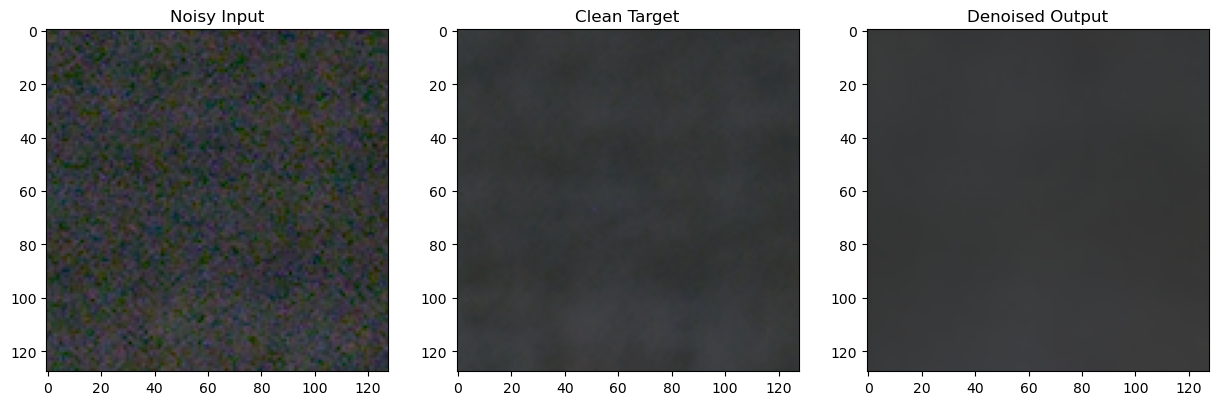

In [10]:
train_model(config)

# Evaluate on Test set

In [11]:
test_model(config)

Using device: cpu
Experiment output directory: ./q2_models/exp3
data_dir: /Users/rotem.green/.cache/kagglehub/datasets/rajat95gupta/smartphone-image-denoising-dataset/versions/1/SIDD_Small_sRGB_Only/Data


Prefetching images: 100%|██████████| 25/25 [00:09<00:00,  2.72it/s]


Test dataset size: 100


/Users/rotem.green/Documents/studies/msc/dip/wet2/train_and_test.py:166: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(latest_weights_path))

Loaded model weights from ./q2_models/exp3/models/model_epoch_24.pth


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


Test Loss = 0.0033, Test PSNR = 28.25 dB
Saved metrics to ./q2_models/exp3/test_metrics.json


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.012928818..0.64891666].


Saved test examples to ./q2_models/exp3/test_examples
